Loading binary_origin train dataset...


100%|██████████| 2/2 [00:05<00:00,  2.91s/it]


Loading binary_origin val dataset...


100%|██████████| 2/2 [00:01<00:00,  1.11it/s]


Accuracy: 91.67%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.95      0.95      0.95        19

    accuracy                           0.92        24
   macro avg       0.87      0.87      0.87        24
weighted avg       0.92      0.92      0.92        24

Accuracy: None


<Figure size 800x600 with 0 Axes>

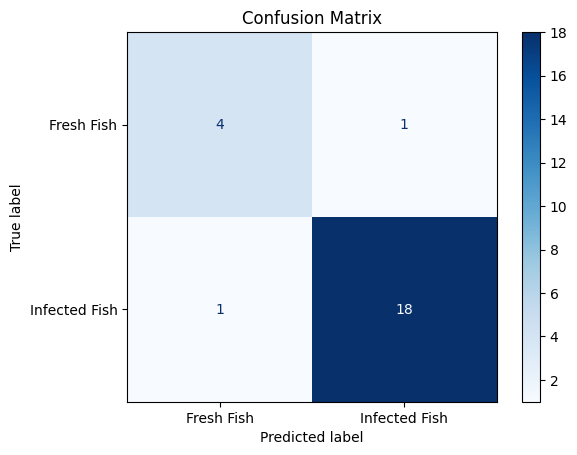

In [4]:
from data_loader import DataLoader
from paper_model import Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dataset_name = "binary_origin"
dataloader = DataLoader(dataset_name=dataset_name, extract_features=True)

model = Model('svm')

# Train the model
model.train(dataloader.X_train, dataloader.y_train)

# Predict on test set
y_pred = model.predict(dataloader.X_test)

# Evaluate the model
accuracy = model.evaluate(dataloader.y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate confusion matrix
cm = confusion_matrix(dataloader.y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fresh Fish', 'Infected Fish'])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Loading binary_augmented train dataset...


100%|██████████| 2/2 [00:56<00:00, 28.45s/it]


Loading binary_augmented val dataset...


100%|██████████| 2/2 [00:14<00:00,  7.38s/it]


Accuracy: 93.72%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        66
           1       0.99      0.92      0.95       157

    accuracy                           0.94       223
   macro avg       0.91      0.95      0.93       223
weighted avg       0.95      0.94      0.94       223



<Figure size 800x600 with 0 Axes>

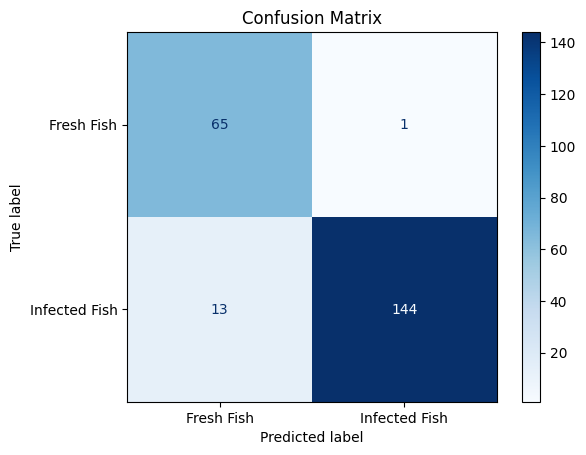

In [5]:
from data_loader import DataLoader
from paper_model import Model

dataset_name = "binary_augmented"
dataloader = DataLoader( dataset_name=dataset_name, extract_features=True)

model = Model('svm')

model.train(dataloader.X_train, dataloader.y_train)
y_pred = model.predict(dataloader.X_test)
model.evaluate(dataloader.y_test, y_pred)
cm = confusion_matrix(dataloader.y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fresh Fish', 'Infected Fish'])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Loading multiclass train dataset...


100%|██████████| 7/7 [01:22<00:00, 11.72s/it]


Loading multiclass val dataset...


100%|██████████| 7/7 [00:20<00:00,  2.98s/it]


Accuracy: 29.43%
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.22      0.27        50
           1       0.21      0.76      0.33        50
           2       0.25      0.06      0.10        50
           3       0.31      0.24      0.27        50
           4       0.53      0.48      0.51        50
           5       0.20      0.08      0.11        50
           6       0.44      0.22      0.29        50

    accuracy                           0.29       350
   macro avg       0.33      0.29      0.27       350
weighted avg       0.33      0.29      0.27       350



<Figure size 800x600 with 0 Axes>

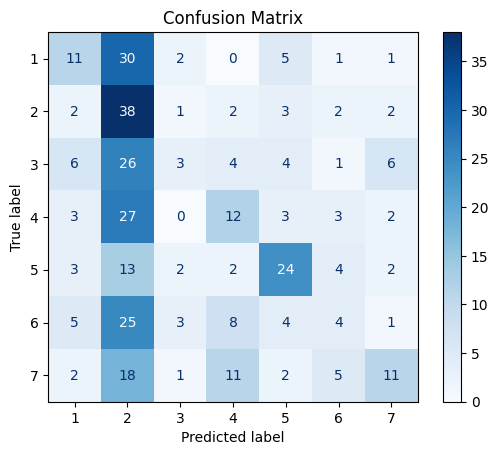

In [7]:
from data_loader import DataLoader
from paper_model import Model

dataset_name = "multiclass"
dataloader = DataLoader( dataset_name=dataset_name, extract_features=True)

model = Model('svm')

model.train(dataloader.X_train, dataloader.y_train)
y_pred = model.predict(dataloader.X_test)
model.evaluate(dataloader.y_test, y_pred)
cm = confusion_matrix(dataloader.y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['1', '2', '3', '4', '5', '6', '7'])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [10]:
from data_loader import DataLoader
from cnn import CustomCNN

dataset_name = "binary_origin"
dataloader = DataLoader( dataset_name=dataset_name, extract_features=False)


cnn = CustomCNN(img_height=250, img_width=600, num_classes=2, num_conv_layers=4)
X_train, y_train = cnn.preprocess_data(dataloader.X_train, dataloader.y_train)
X_test, y_test = cnn.preprocess_data(dataloader.X_test, dataloader.y_test)

cnn.fit(X_train, y_train, X_test, y_test, epochs=12, model_save_path='./best_model_origin.keras')
y_pred = cnn.predict(X_test)
cnn.evaluate(y_test, y_pred)

Loading binary_origin train dataset...


100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


Loading binary_origin val dataset...


100%|██████████| 2/2 [00:00<00:00, 10.30it/s]

Epoch 1/12



c:\Users\ACER\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.6553 - loss: 38.41
Epoch 1: Macro F1 Score: 0.4419
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 833ms/step - accuracy: 0.6705 - loss: 41.2906 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - macro_f1: 0.4419
Epoch 2/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.6090 - loss: 10.54
Epoch 2: Macro F1 Score: 0.4419
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 713ms/step - accuracy: 0.6049 - loss: 10.2200 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - macro_f1: 0.4419
Epoch 3/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.7541 - loss: 13.30
Epoch 3: Macro F1 Score: 0.8737
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 704ms/step - accuracy: 0.7600 - loss: 12.7326 - val_accuracy: 0.5556 - val_loss: 0.6035 - macro_f1: 0.8737
Epoch 4/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.6575 - loss: 0.93
Epoch 4: Macro F1 Score: 0.4419
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 681ms/step - accuracy: 0.6660 - loss: 0.9289 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - macro_f1: 0.4419
E

In [7]:
from data_loader import DataLoader
from cnn import CustomCNN

dataset_name = "binary_augmented"
dataloader = DataLoader( dataset_name=dataset_name, extract_features=False)


cnn = CustomCNN(img_height=250, img_width=600, num_classes=2, num_conv_layers=5)
X_train, y_train = cnn.preprocess_data(dataloader.X_train, dataloader.y_train)
X_test, y_test = cnn.preprocess_data(dataloader.X_test, dataloader.y_test)

cnn.fit(X_train, y_train, X_test, y_test, epochs=20, model_save_path='./best_model_augmented.keras')
y_pred = cnn.predict(X_test)
cnn.evaluate(y_test, y_pred)

Loading binary_augmented train dataset...


100%|██████████| 2/2 [00:05<00:00,  2.63s/it]


Loading binary_augmented val dataset...


100%|██████████| 2/2 [00:01<00:00,  1.65it/s]
c:\Users\ACER\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 328ms/stepep - accuracy: 0.5564 
Epoch 1: Macro F1 Score: 0.5500
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5574 - loss: 2.7168 - val_accuracy: 0.4494 - val_loss: 0.7092 - macro_f1: 0.5500
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/stepep - accuracy: 0.6033 
Epoch 2: Macro F1 Score: 0.7148
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 977ms/step - accuracy: 0.6045 - loss: 0.6596 - val_accuracy: 0.6629 - val_loss: 0.6371 - macro_f1: 0.7148
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 293ms/stepep - accuracy: 0.6624 
Epoch 3: Macro F1 Score: 0.7562
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 943ms/step - accuracy: 0.6621 - loss: 0.6110 - val_accuracy: 0.8876 - val_loss: 0.5688 - macro_f1: 0.7562
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/stepep - accuracy: 0.7337 
Epoch 4: Macro F1 Score: 0.8041
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 918ms/step - accuracy: 0.7341 - loss: 0.5349 - val_accuracy: 0.9438 - val_loss: 0.2986 - macro_f1: 0.8041
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [9]:
from data_loader import DataLoader
from cnn import CustomCNN

dataset_name = "multiclass"
dataloader = DataLoader( dataset_name=dataset_name, extract_features=False)


cnn = CustomCNN(img_height=250, img_width=600, num_classes=7, num_conv_layers=6)
X_train, y_train = cnn.preprocess_data(dataloader.X_train, dataloader.y_train)
X_test, y_test = cnn.preprocess_data(dataloader.X_test, dataloader.y_test)

cnn.fit(X_train, y_train, X_test, y_test, epochs=100, model_save_path='./best_model_multiclass.keras')
y_pred = cnn.predict(X_test)
cnn.evaluate(y_test, y_pred)

Loading multiclass train dataset...


100%|██████████| 7/7 [00:00<00:00, 14.88it/s]


Loading multiclass val dataset...


100%|██████████| 7/7 [00:00<00:00, 56.63it/s]


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step - accuracy:
Epoch 1: Macro F1 Score: 0.1157
40/40 ━━━━━━━━━━━━━━━━━━━━ 37s 880ms/step - accuracy: 0.1745 - loss: 3.6974 - val_accuracy: 0.0000e+00 - val_loss: 2.1628 - macro_f1: 0.1157
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step - accuracy:
Epoch 2: Macro F1 Score: 0.2127
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 807ms/step - accuracy: 0.1799 - loss: 1.9190 - val_accuracy: 0.0000e+00 - val_loss: 2.5456 - macro_f1: 0.2127
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - accuracy:
Epoch 3: Macro F1 Score: 0.2198
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 805ms/step - accuracy: 0.2324 - loss: 1.8438 - val_accuracy: 0.0000e+00 - val_loss: 2.5973 - macro_f1: 0.2198
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - accuracy:
Epoch 4: Macro F1 Score: 0.2177
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 824ms/step - accuracy: 0.2371 - loss: 1.8083 - val_accuracy: 0.0000e+00 - val_loss: 2.8038 - macro_f1: 0.2177
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 256ms/